In [1]:
import pylab as py
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.lib import scimath

In [2]:
a = 0.3
epsilon = 0.1 
gam = 0.5 
v_values = np.linspace(-0.6,1.6,23)
current = 1

In [3]:
w_for_v = [] #w values that give v nullclines
w_for_w = [] #w values taht give w nullclines 
for i in range(len(v_values)):
    w_for_v.append(current-(v_values[i]*(v_values[i]-a)*(v_values[i]-1)))
    w_for_w.append(v_values[i]/gam)

In [4]:
def remove_imag(pol_roots):
    
    for i in pol_roots:
        if np.imag(i) == 0:
            pol_roots = np.real(i)
        else:  
            i == math.nan

    return pol_roots

In [5]:
v_polynomial = [-1,1+a,-(a+(1/gam)),current]
v_roots = np.roots(v_polynomial)
v_roots = remove_imag(v_roots)
w_roots = (v_roots/gam)

In [6]:
def jac(v, w, a, gam, epsilon):
    return np.array([[(-3*(v**2)+(2*v*(1+a))-a), -1],
                       [epsilon, -epsilon*gam]])

In [7]:
J = jac(v_roots,w_roots,a,gam,epsilon)
tr = np.trace(J)
det = np.linalg.det(J)

In [8]:
s1 = 0.5*(tr + scimath.sqrt((tr**2)-(4*det)))
s2 = 0.5*(tr - scimath.sqrt((tr**2)-(4*det)))
s = [s1,s2]

In [9]:
s1_real = np.real(s[0])
s1_imag = np.imag(s[0])
s2_real = np.real(s[1])
s2_imag = np.imag(s[1])

### Evaluated Jacobian and Set of Eigenvalues

In [10]:
print('The Jacobian is', J)
print('The eigenvalues are',s)

The Jacobian is [[ 0.23618286 -1.        ]
 [ 0.1        -0.05      ]]
The eigenvalues are [(0.09309143204331055+0.2820014930382367j), (0.09309143204331055-0.2820014930382367j)]


In [11]:
#Stability of Equilbriua 

if ((s[0]) or (s[1])) > 0:  
    str1 = ['Unstable Equilibrium at (V = ',v_roots, ', w = ', w_roots, ') --> '];
else: 
    (s[0] and s[1]) < 0
    str1 = ['Stable Equilibrium at (V = ', v_roots, ', w = ', w_roots, ') --> '];
if (np.imag(s[0])or np.imag(s[1])) == 0.0 :
    str2 = 'No Oscillations'
else:
    str2 = 'Oscillations'

### Equilirbrium values

In [12]:
print([str1, str2])

[['Unstable Equilibrium at (V = ', 0.5284656433839715, ', w = ', 1.056931286767943, ') --> '], 'Oscillations']


In [13]:
w_values = np.linspace(-0.4,1.4,19)

In [14]:
[V_grid,W_grid] = np.meshgrid(v_values,w_values)

In [15]:
def fitz_hugh(t, v, w, epsilon, gamma, I):

    dVdt = -(v)*(v-a)*(v-1)-w+I
    dwdt = epsilon*(v-(gamma-w))
    
    return dVdt,dwdt

In [16]:
dv,dw = fitz_hugh(0,V_grid,W_grid,epsilon,gam,current)

In [17]:
def fitz_hugh(z,t):
    v = z[0]
    w = z[1]
    dVdt = current-(v*(v-a)*(v-1))-w
    dwdt = epsilon*(v-(gam*w))
    
    return [dVdt, dwdt]

z0 = [0.1,0.1]
t = np.linspace(0,200,200)
y = odeint(fitz_hugh,z0,t)

### Solution Plot

Text(0.5,1,'Solution Plot')

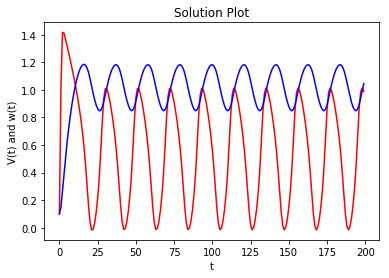

In [18]:
py.plot(y[:,0],'r') #membrane potential
py.plot(y[:,1],'b') #w
py.xlabel('t')
py.ylabel('V(t) and w(t)')
py.title('Solution Plot')

### Phase Plane 

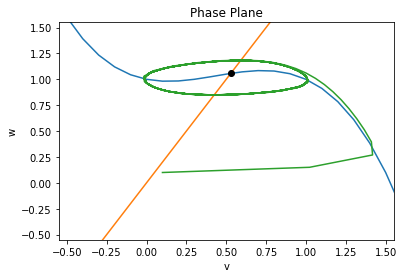

In [19]:
py.title('Phase Plane')
py.xlabel('v')
py.ylabel('w')
py.plot(v_values,w_for_v)
py.plot(v_values,w_for_w)
py.plot(v_roots,w_roots,'o',color= 'black')
py.xlim([-0.55, 1.55])
py.ylim([-0.55, 1.55])
py.plot(y[:,0],y[:,1])

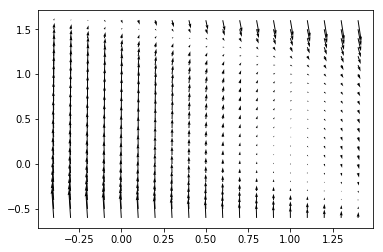

In [20]:
w = V_grid
x = W_grid
u = dw
v = dv
plt.quiver(x,w,u,v)